In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew ,boxcox
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler , MinMaxScaler ,MaxAbsScaler,StandardScaler
from sklearn.linear_model import LinearRegression,ElasticNet,ElasticNetCV
from scipy.special import boxcox1p 

df = pd.read_csv("/Users/hajiaga/Downloads/Hitters.csv")

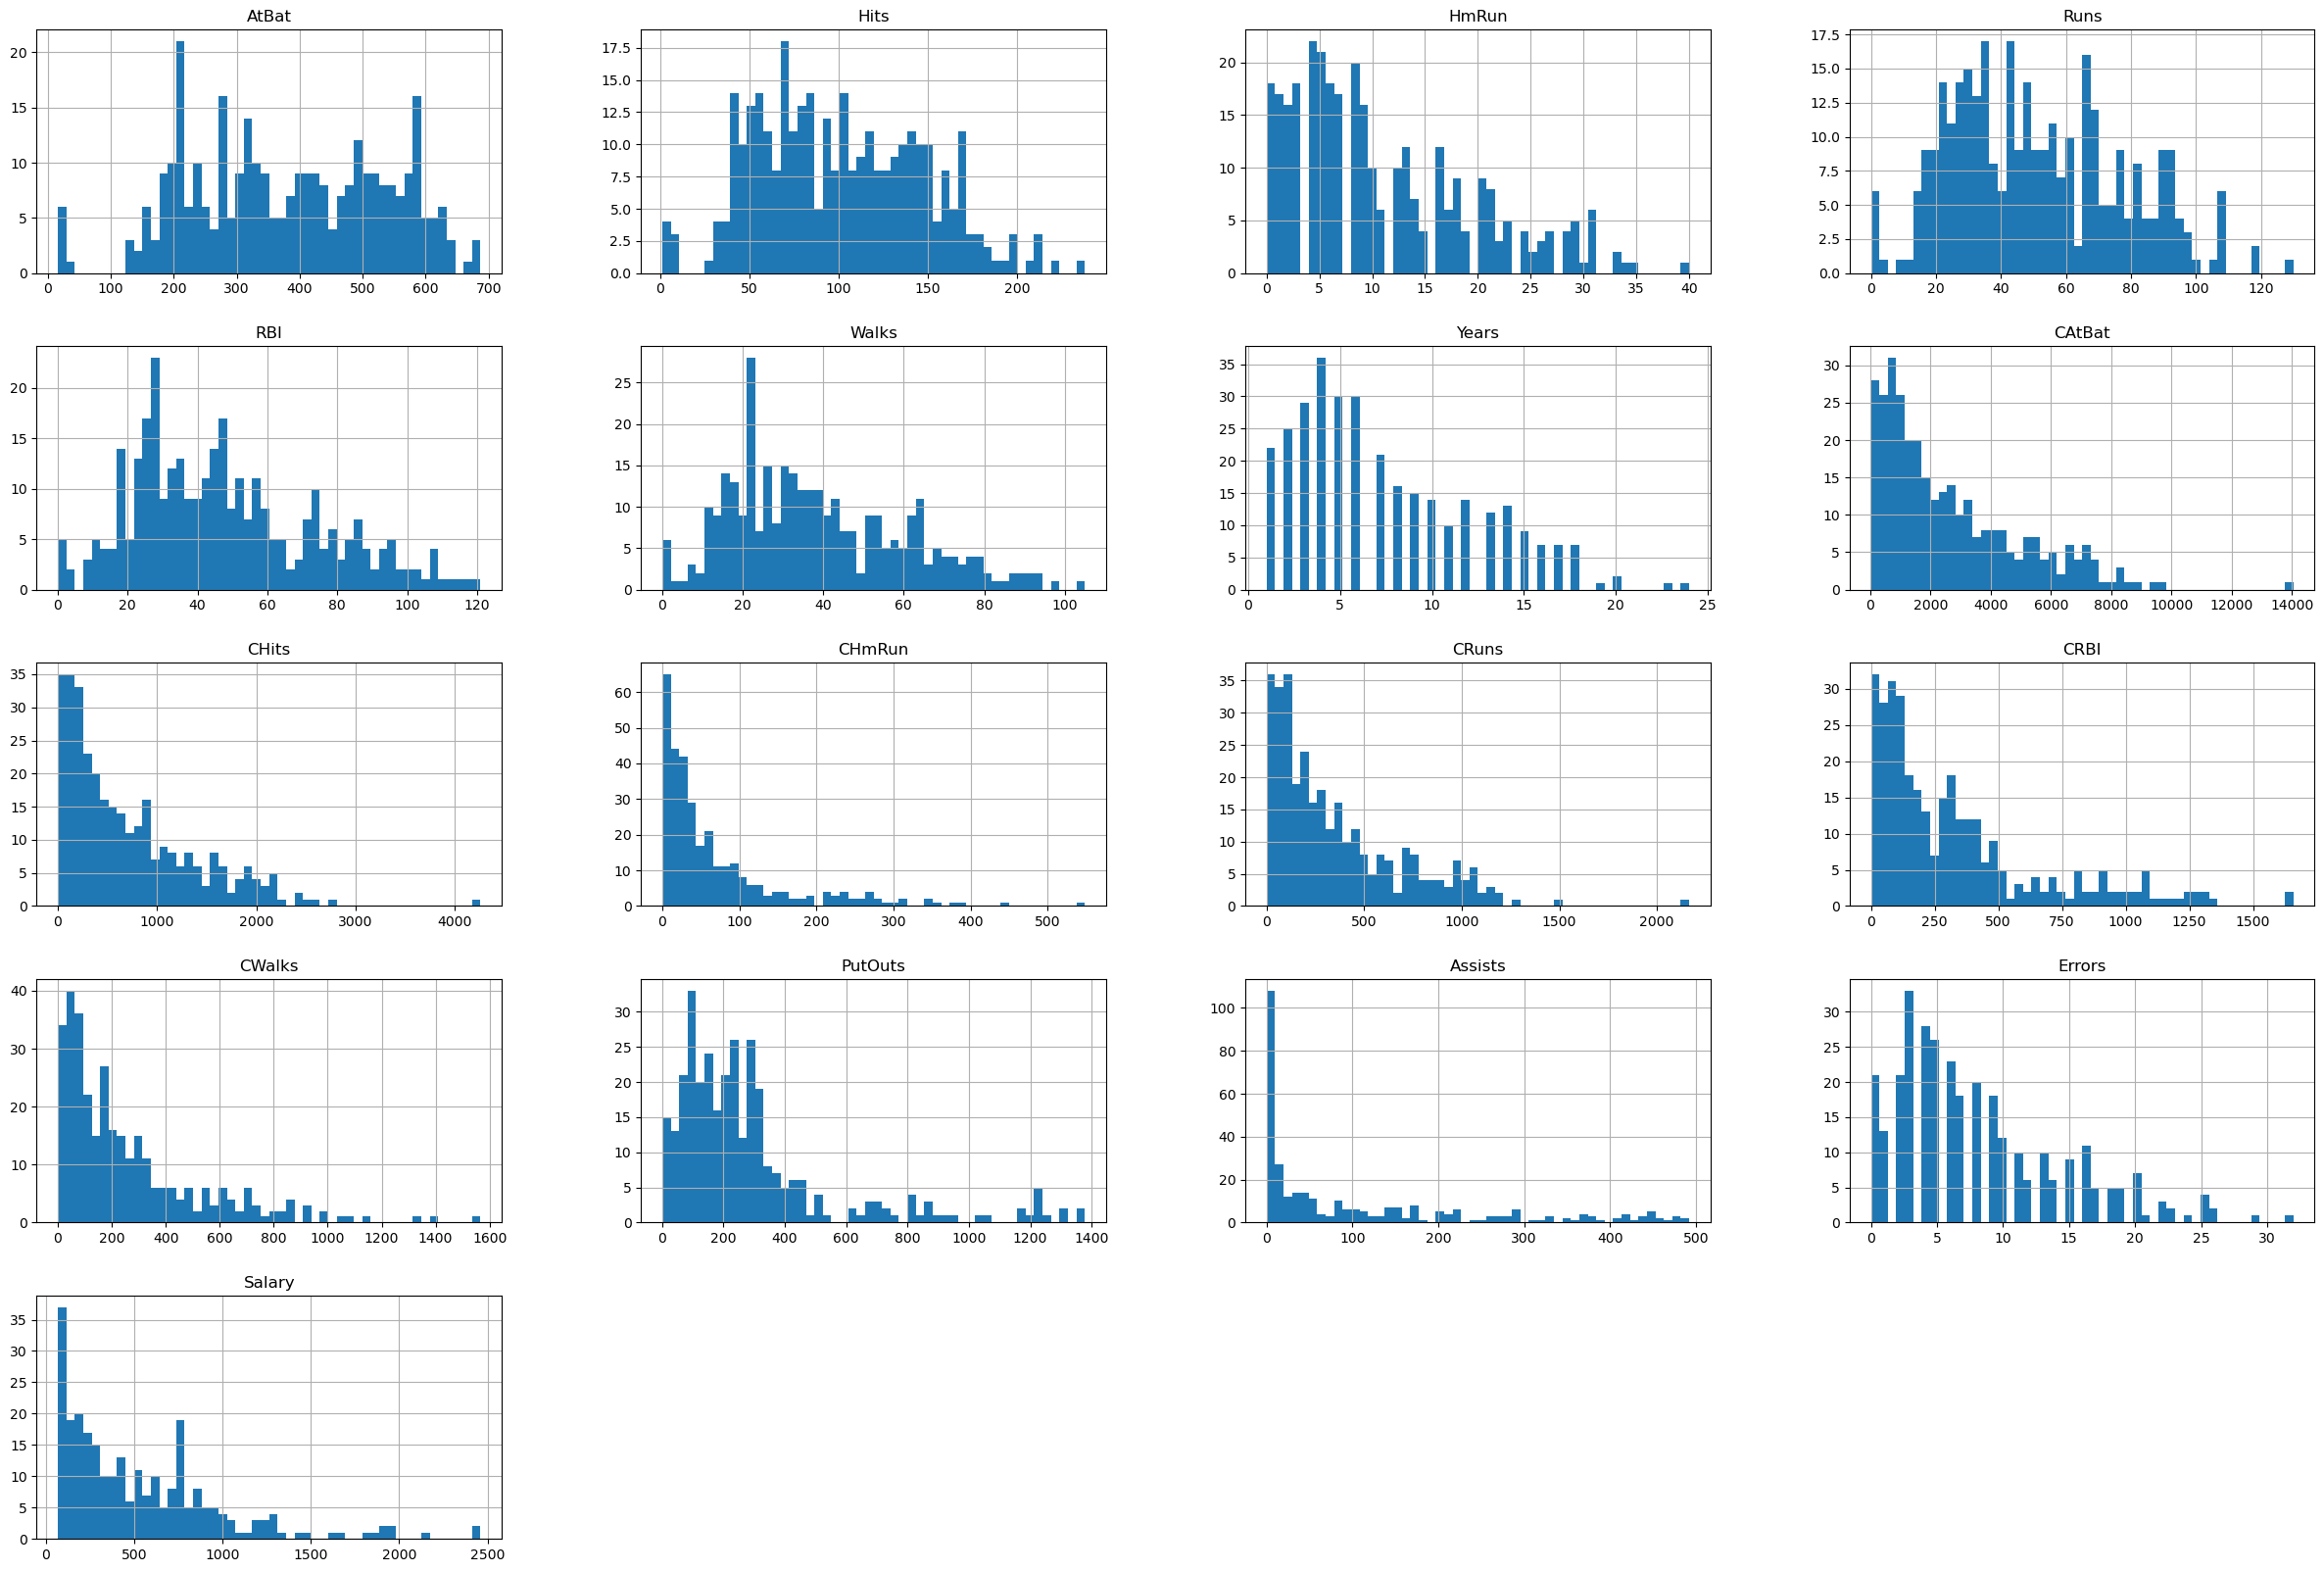

In [173]:
df.hist(bins=50 , figsize=[30,20])
plt.show()

In [174]:
# Lets create new columns with my negative basketball knowledge
df["hitperyear"] = df["CHits"]/df["Years"]
df["atbatyear"] = df["CAtBat"]/df["Years"]
df["chnrunoeryear"] = df["CHmRun"]/df["Years"]
df["Crunsperyear"] = df["CRuns"]/df["Years"]
df["CRBIperyear"] = df["CRBI"]/df["Years"]
df["CWalksperyear"] = df["CWalks"]/df["Years"]

#it didnt have big impact
#df["RB/R"] = df["CRBI"]/df["CRuns"]
#It didnt have big impact on code
df.drop(["Errors"],inplace=True,axis=1)

In [175]:
# We are only selecting columns which have skewness over 0.75
num_cols = df.dtypes[df.dtypes != "object"].index
skewed_feats = df[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})

skewed_feats =skewness[skewness>0.75].index

for col in skewed_feats:
    if col !="Salary":
# we are using boxcox method and we need to add a number to our data to process it with boxcox method
        df[col] += 1
        df[col],lam = boxcox(df[col])
# I just wanted to handle Salary column with logarithm method
df["Salary"] = np.log1p(df["Salary"])
# I am creating ColumnTransformer to transform Object typed data to number based and i thought that OneHotEncoder is the best method to do so but i will try labelencoder depending on the situation.
ctoh = ColumnTransformer([("Onehotenc" , OneHotEncoder(drop="first") , df.select_dtypes(include="O").columns )],remainder="passthrough")
ctoh.fit_transform(df)
#I will look at the corraletion between columns in here
corr = df.corr()
corr = df.corr()
corr["Salary"]

AtBat            0.412483
Hits             0.437791
HmRun            0.347714
Runs             0.413443
RBI              0.436245
Walks            0.414701
Years            0.627037
CAtBat           0.722098
CHits            0.735733
CHmRun           0.666790
CRuns            0.740546
CRBI             0.738713
CWalks           0.700812
PutOuts          0.179298
Assists          0.051178
Salary           1.000000
hitperyear       0.593480
atbatyear        0.555583
chnrunoeryear    0.429454
Crunsperyear     0.565363
CRBIperyear      0.577706
CWalksperyear    0.490983
Name: Salary, dtype: float64

In [176]:
train_df,test_df = train_test_split(df,random_state=42,test_size=0.25)
Y_tr = train_df["Salary"]
X_tr = train_df.drop(["Salary"],axis=1)
Y_te = test_df["Salary"]
X_te = test_df.drop(["Salary"],axis=1)
Y_te.head()

173         NaN
132    5.786897
197         NaN
9      7.003974
104         NaN
Name: Salary, dtype: float64

In [177]:
from sklearn.metrics import mean_squared_error
inputs = [RobustScaler(with_centering=False), MaxAbsScaler(), StandardScaler(with_mean=False)]
best_i = 0
best_error = 0
for i in inputs:
    pipeline = make_pipeline(i, LinearRegression())
    pipeline.fit(X_tr, Y_tr)
    predictions = pipeline.predict(X_te)
    error = mean_squared_error(Y_te, predictions)
    if error < best_error:
        best_i = i
        best_error = error
print(f"Best i: {best_i}")
print(f"Best error: {best_error}")

ValueError: could not convert string to float: 'A'